In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
bgl = pd.read_csv('Shark Tank Companies (2).csv')

In [3]:
bgl.head(5).T

,0,1,2,3,4
deal,False,True,True,False,False
description,Bluetooth device implant for your ear.,Retail and wholesale pie factory with two reta...,Ava the Elephant is a godsend for frazzled par...,"Organizing, packing, and moving services deliv...",Interactive media centers for healthcare waiti...
episode,1,1,1,1,1
category,Novelties,Specialty Food,Baby and Child Care,Consumer Services,Consumer Services
entrepreneurs,Darrin Johnson,Tod Wilson,Tiffany Krumins,"Nick Friedman, Omar Soliman",Kevin Flannery
location,"St. Paul, MN","Somerset, NJ","Atlanta, GA","Tampa, FL","Cary, NC"
website,NaN,http://whybake.com/,http://www.avatheelephant.com/,http://collegehunkshaulingjunk.com/,http://www.wispots.com/
askedFor,1000000,460000,50000,250000,1200000
exchangeForStake,15,10,15,25,10
valuation,6666667,4600000,333333,1000000,12000000


In [4]:
bgl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [5]:
new_df = bgl[['deal','description']]

In [6]:
new_df

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


In [7]:
won = new_df[new_df['deal'] == True]

In [8]:
won

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
9,True,An educational record label and publishing hou...
10,True,A battery-operated cooking device that siphons...
...,...,...
489,True,SynDaver Labs makes synthetic body parts for u...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...


In [9]:
lost = new_df[new_df['deal'] == False]

In [10]:
lost

,deal,description
0,False,Bluetooth device implant for your ear.
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
6,False,A mixed martial arts clothing line looking to ...
7,False,"Attach Noted is a detachable ""arm"" that holds ..."
...,...,...
482,False,Buck Mason makes high-quality men's clothing i...
484,False,"Frameri answers the question, ""Why aren't your..."
485,False,The Paleo Diet Bar is a nutrition bar that is ...
488,False,Sunscreen Mist adds another point of access fo...


In [11]:
won = won.drop(['deal'], axis = 1)
won

,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
9,An educational record label and publishing hou...
10,A battery-operated cooking device that siphons...
...,...
489,SynDaver Labs makes synthetic body parts for u...
490,Zoom Interiors is a virtual service for interi...
491,Spikeball started out as a casual outdoors gam...
492,Shark Wheel is out to literally reinvent the w...


In [12]:
lost = lost.drop(['deal'], axis = 1)
lost

,description
0,Bluetooth device implant for your ear.
3,"Organizing, packing, and moving services deliv..."
4,Interactive media centers for healthcare waiti...
6,A mixed martial arts clothing line looking to ...
7,"Attach Noted is a detachable ""arm"" that holds ..."
...,...
482,Buck Mason makes high-quality men's clothing i...
484,"Frameri answers the question, ""Why aren't your..."
485,The Paleo Diet Bar is a nutrition bar that is ...
488,Sunscreen Mist adds another point of access fo...


In [13]:
won["chars"] = won["description"].str.len()
lost["chars"] = lost["description"].str.len()

In [14]:
total_won = won["chars"].sum()
total_lost = lost["chars"].sum()

In [15]:
print("Number of characters where deal was WON",total_won)
print("Number of characters where deal was LOST",total_lost)

Number of characters where deal was WON 64060
Number of characters where deal was LOST 47184


In [16]:
won = won.drop(['chars'], axis = 1)
lost = lost.drop(['chars'], axis = 1)

In [17]:
won.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 494
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  251 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [18]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
additional_words = ['also', 'made', 'makes', 'like', 'this', 'even', 'company']
stop.extend(additional_words)

In [20]:
won['description'] = won['description'].str.lower()

In [21]:
won['description_without_stopwords'] = won['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
won_stopword_removed = won[['description_without_stopwords']]
won_stopword_removed

,description_without_stopwords
1,retail wholesale pie factory two retail locati...
2,ava elephant godsend frazzled parents young ch...
5,"one first entrepreneurs pitch shark tank, susa..."
9,educational record label publishing house desi...
10,"battery-operated cooking device siphons juice,..."
...,...
489,syndaver labs synthetic body parts use medical...
490,zoom interiors virtual service interior design...
491,"spikeball started casual outdoors game, grown ..."
492,shark wheel literally reinvent wheel. innovati...


In [23]:
lost['description'] = lost['description'].str.lower()

In [24]:
lost['description_without_stopwords'] = lost['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [25]:
lost_stopword_removed = lost[['description_without_stopwords']]
lost_stopword_removed

,description_without_stopwords
0,bluetooth device implant ear.
3,"organizing, packing, moving services delivered..."
4,interactive media centers healthcare waiting r...
6,mixed martial arts clothing line looking becom...
7,"attach noted detachable ""arm"" holds post-it no..."
...,...
482,buck mason high-quality men's clothing usa.
484,"frameri answers question, ""why glasses flexibl..."
485,"paleo diet bar nutrition bar gluten, soy, dair..."
488,sunscreen mist adds another point access sunsc...


In [26]:
won = won.drop(['description_without_stopwords'], axis = 1)
lost = lost.drop(['description_without_stopwords'], axis = 1)

In [27]:
from collections import Counter
Counter(" ".join(won_stopword_removed["description_without_stopwords"]).split()).most_common(3)

[('make', 25), ('designed', 19), ('easy', 18)]

In [28]:
from collections import Counter
Counter(" ".join(lost_stopword_removed["description_without_stopwords"]).split()).most_common(3)

[('make', 19), ('designed', 15), ('use', 15)]

In [29]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
won_stopword_removed

,description_without_stopwords
1,retail wholesale pie factory two retail locati...
2,ava elephant godsend frazzled parents young ch...
5,"one first entrepreneurs pitch shark tank, susa..."
9,educational record label publishing house desi...
10,"battery-operated cooking device siphons juice,..."
...,...
489,syndaver labs synthetic body parts use medical...
490,zoom interiors virtual service interior design...
491,"spikeball started casual outdoors game, grown ..."
492,shark wheel literally reinvent wheel. innovati...


In [31]:
p = won_stopword_removed['description_without_stopwords']
p

1      retail wholesale pie factory two retail locati...
2      ava elephant godsend frazzled parents young ch...
5      one first entrepreneurs pitch shark tank, susa...
9      educational record label publishing house desi...
10     battery-operated cooking device siphons juice,...
                             ...                        
489    syndaver labs synthetic body parts use medical...
490    zoom interiors virtual service interior design...
491    spikeball started casual outdoors game, grown ...
492    shark wheel literally reinvent wheel. innovati...
494    sway motorsports three-wheeled, all-electric, ...
Name: description_without_stopwords, Length: 251, dtype: object

In [32]:
wc_a = ' '.join(p)

Word Cloud for WON deals


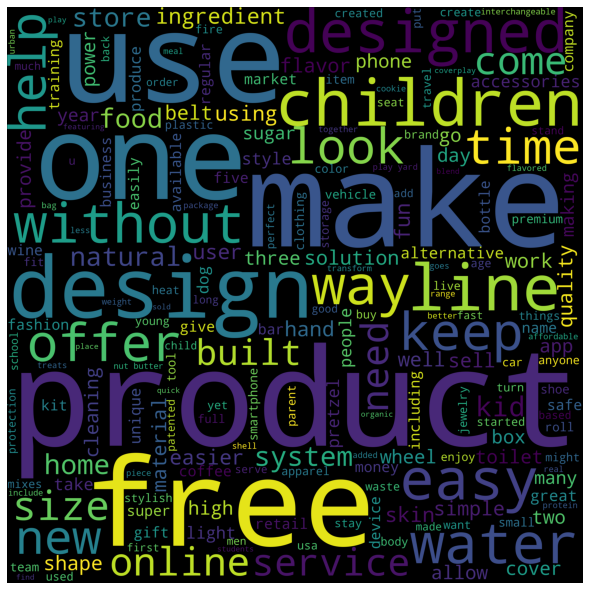

In [33]:
# Word Cloud for WON
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000,background_color ='black',min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)
print("Word Cloud for WON deals")
plt.show()

In [34]:
q = lost_stopword_removed['description_without_stopwords']
q

0                          bluetooth device implant ear.
3      organizing, packing, moving services delivered...
4      interactive media centers healthcare waiting r...
6      mixed martial arts clothing line looking becom...
7      attach noted detachable "arm" holds post-it no...
                             ...                        
482          buck mason high-quality men's clothing usa.
484    frameri answers question, "why glasses flexibl...
485    paleo diet bar nutrition bar gluten, soy, dair...
488    sunscreen mist adds another point access sunsc...
493    adriana montano wants open first cat cafe flor...
Name: description_without_stopwords, Length: 244, dtype: object

In [35]:
wc_b = ' '.join(q)

Word Cloud for LOST deals


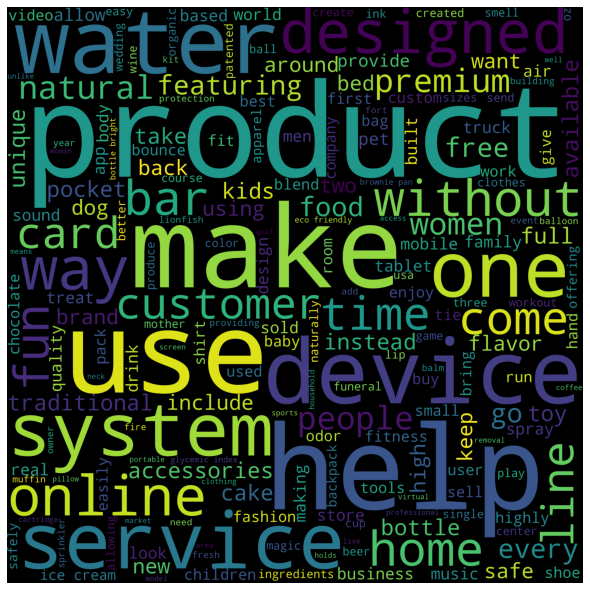

In [36]:
# Word Cloud for LOST
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000,background_color ='black',min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
print("Word Cloud for LOST deals")
plt.show()